## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.302464  0.460920  0.442796  0.464118  1.307222 -0.265226
1  1.723181 -1.151735  0.856168 -1.214004 -0.034151 -0.784907
2  1.718252 -0.555455  1.007742  1.217498 -1.327445  1.057396
3 -1.388716  0.702638  0.543153  0.360041  1.625870 -0.320507
4  1.601030 -1.611453 -0.456554 -0.449416 -0.047645 -1.304701


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9743042	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9658023	total: 58.8ms	remaining: 29.3s
2:	learn: 0.9550159	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9441623	total: 60ms	remaining: 14.9s
4:	learn: 0.9347855	total: 60.5ms	remaining: 12s
5:	learn: 0.9265161	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9154020	total: 61.4ms	remaining: 8.71s
7:	learn: 0.9074638	total: 61.9ms	remaining: 7.68s
8:	learn: 0.8995429	total: 62.4ms	remaining: 6.88s
9:	learn: 0.8906878	total: 63ms	remaining: 6.23s
10:	learn: 0.8806725	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8724652	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8636109	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8562464	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8483797	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8400329	total: 65.8ms	remaining: 4.04s
16:	learn: 0.8322347	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8248925	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8165612	total: 67.2ms	remaining: 3.47s

91:	learn: 0.4340481	total: 103ms	remaining: 1.01s
92:	learn: 0.4307424	total: 104ms	remaining: 1.01s
93:	learn: 0.4275595	total: 104ms	remaining: 1s
94:	learn: 0.4244968	total: 105ms	remaining: 996ms
95:	learn: 0.4207581	total: 105ms	remaining: 990ms
96:	learn: 0.4179196	total: 106ms	remaining: 984ms
97:	learn: 0.4151974	total: 106ms	remaining: 978ms
98:	learn: 0.4115906	total: 107ms	remaining: 974ms
99:	learn: 0.4081226	total: 107ms	remaining: 967ms
100:	learn: 0.4053115	total: 108ms	remaining: 961ms
101:	learn: 0.4021360	total: 108ms	remaining: 954ms
102:	learn: 0.3987916	total: 109ms	remaining: 949ms
103:	learn: 0.3953006	total: 109ms	remaining: 942ms
104:	learn: 0.3923121	total: 110ms	remaining: 937ms
105:	learn: 0.3892820	total: 110ms	remaining: 931ms
106:	learn: 0.3867963	total: 111ms	remaining: 926ms
107:	learn: 0.3840400	total: 111ms	remaining: 921ms
108:	learn: 0.3812833	total: 112ms	remaining: 916ms
109:	learn: 0.3789206	total: 113ms	remaining: 911ms
110:	learn: 0.3763810	to

258:	learn: 0.1373163	total: 186ms	remaining: 532ms
259:	learn: 0.1363821	total: 187ms	remaining: 531ms
260:	learn: 0.1356257	total: 187ms	remaining: 529ms
261:	learn: 0.1347398	total: 187ms	remaining: 528ms
262:	learn: 0.1340458	total: 188ms	remaining: 527ms
263:	learn: 0.1334270	total: 188ms	remaining: 525ms
264:	learn: 0.1327018	total: 189ms	remaining: 523ms
265:	learn: 0.1321072	total: 189ms	remaining: 522ms
266:	learn: 0.1313375	total: 190ms	remaining: 522ms
267:	learn: 0.1305158	total: 190ms	remaining: 520ms
268:	learn: 0.1296580	total: 191ms	remaining: 518ms
269:	learn: 0.1286777	total: 191ms	remaining: 518ms
270:	learn: 0.1277413	total: 192ms	remaining: 516ms
271:	learn: 0.1268919	total: 193ms	remaining: 515ms
272:	learn: 0.1262684	total: 193ms	remaining: 514ms
273:	learn: 0.1254856	total: 193ms	remaining: 513ms
274:	learn: 0.1246498	total: 194ms	remaining: 511ms
275:	learn: 0.1236791	total: 194ms	remaining: 510ms
276:	learn: 0.1230110	total: 195ms	remaining: 508ms
277:	learn: 

451:	learn: 0.0464669	total: 285ms	remaining: 346ms
452:	learn: 0.0461752	total: 286ms	remaining: 345ms
453:	learn: 0.0459141	total: 286ms	remaining: 344ms
454:	learn: 0.0456423	total: 287ms	remaining: 343ms
455:	learn: 0.0455018	total: 287ms	remaining: 342ms
456:	learn: 0.0453838	total: 287ms	remaining: 342ms
457:	learn: 0.0452474	total: 288ms	remaining: 341ms
458:	learn: 0.0451318	total: 288ms	remaining: 340ms
459:	learn: 0.0448664	total: 289ms	remaining: 339ms
460:	learn: 0.0445810	total: 289ms	remaining: 338ms
461:	learn: 0.0445022	total: 290ms	remaining: 337ms
462:	learn: 0.0444243	total: 290ms	remaining: 337ms
463:	learn: 0.0441652	total: 291ms	remaining: 336ms
464:	learn: 0.0440632	total: 291ms	remaining: 335ms
465:	learn: 0.0439531	total: 292ms	remaining: 334ms
466:	learn: 0.0437352	total: 292ms	remaining: 334ms
467:	learn: 0.0434602	total: 293ms	remaining: 333ms
468:	learn: 0.0433852	total: 293ms	remaining: 332ms
469:	learn: 0.0433111	total: 294ms	remaining: 331ms
470:	learn: 

617:	learn: 0.0216662	total: 368ms	remaining: 228ms
618:	learn: 0.0215323	total: 369ms	remaining: 227ms
619:	learn: 0.0213964	total: 369ms	remaining: 226ms
620:	learn: 0.0213557	total: 370ms	remaining: 226ms
621:	learn: 0.0212873	total: 371ms	remaining: 225ms
622:	learn: 0.0211688	total: 372ms	remaining: 225ms
623:	learn: 0.0211453	total: 372ms	remaining: 224ms
624:	learn: 0.0210129	total: 373ms	remaining: 224ms
625:	learn: 0.0209737	total: 373ms	remaining: 223ms
626:	learn: 0.0209507	total: 374ms	remaining: 222ms
627:	learn: 0.0208349	total: 374ms	remaining: 222ms
628:	learn: 0.0207966	total: 375ms	remaining: 221ms
629:	learn: 0.0206678	total: 375ms	remaining: 220ms
630:	learn: 0.0206455	total: 376ms	remaining: 220ms
631:	learn: 0.0205811	total: 376ms	remaining: 219ms
632:	learn: 0.0204680	total: 376ms	remaining: 218ms
633:	learn: 0.0204464	total: 377ms	remaining: 218ms
634:	learn: 0.0203222	total: 377ms	remaining: 217ms
635:	learn: 0.0202186	total: 378ms	remaining: 216ms
636:	learn: 

749:	learn: 0.0124413	total: 436ms	remaining: 145ms
750:	learn: 0.0123716	total: 436ms	remaining: 145ms
751:	learn: 0.0123194	total: 437ms	remaining: 144ms
752:	learn: 0.0122539	total: 437ms	remaining: 143ms
753:	learn: 0.0121895	total: 438ms	remaining: 143ms
754:	learn: 0.0121388	total: 438ms	remaining: 142ms
755:	learn: 0.0120719	total: 439ms	remaining: 142ms
756:	learn: 0.0120315	total: 439ms	remaining: 141ms
757:	learn: 0.0119945	total: 440ms	remaining: 140ms
758:	learn: 0.0119179	total: 440ms	remaining: 140ms
759:	learn: 0.0118432	total: 441ms	remaining: 139ms
760:	learn: 0.0117892	total: 441ms	remaining: 139ms
761:	learn: 0.0117164	total: 442ms	remaining: 138ms
762:	learn: 0.0116948	total: 442ms	remaining: 137ms
763:	learn: 0.0116735	total: 443ms	remaining: 137ms
764:	learn: 0.0116527	total: 443ms	remaining: 136ms
765:	learn: 0.0116322	total: 444ms	remaining: 136ms
766:	learn: 0.0115828	total: 444ms	remaining: 135ms
767:	learn: 0.0115628	total: 445ms	remaining: 134ms
768:	learn: 

882:	learn: 0.0071570	total: 503ms	remaining: 66.6ms
883:	learn: 0.0071229	total: 503ms	remaining: 66ms
884:	learn: 0.0071049	total: 503ms	remaining: 65.4ms
885:	learn: 0.0070670	total: 504ms	remaining: 64.8ms
886:	learn: 0.0070239	total: 504ms	remaining: 64.2ms
887:	learn: 0.0070169	total: 505ms	remaining: 63.6ms
888:	learn: 0.0070108	total: 505ms	remaining: 63ms
889:	learn: 0.0070048	total: 505ms	remaining: 62.5ms
890:	learn: 0.0069628	total: 506ms	remaining: 61.9ms
891:	learn: 0.0069455	total: 506ms	remaining: 61.3ms
892:	learn: 0.0069397	total: 507ms	remaining: 60.7ms
893:	learn: 0.0069031	total: 508ms	remaining: 60.2ms
894:	learn: 0.0068623	total: 508ms	remaining: 59.6ms
895:	learn: 0.0068557	total: 509ms	remaining: 59ms
896:	learn: 0.0068500	total: 509ms	remaining: 58.5ms
897:	learn: 0.0068444	total: 510ms	remaining: 57.9ms
898:	learn: 0.0068277	total: 510ms	remaining: 57.3ms
899:	learn: 0.0067922	total: 511ms	remaining: 56.7ms
900:	learn: 0.0067527	total: 511ms	remaining: 56.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

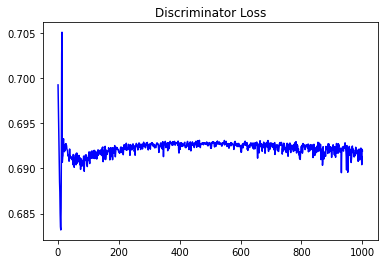

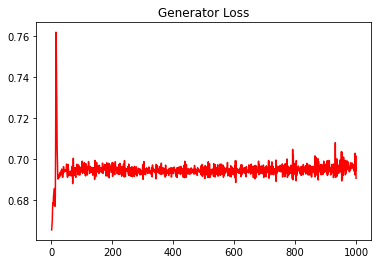

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0391936530626045


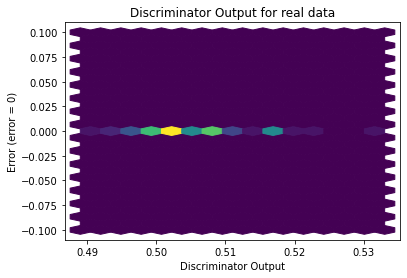

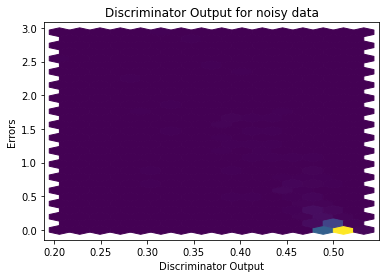

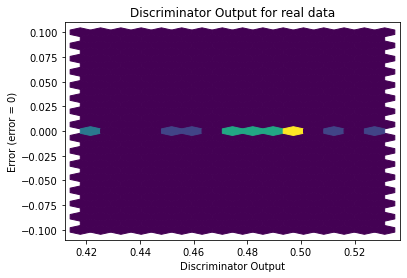

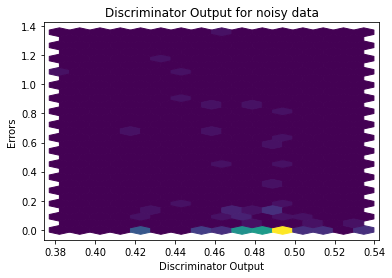

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


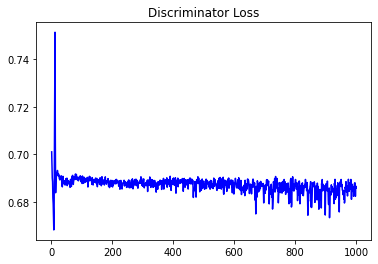

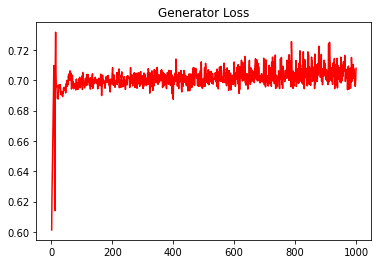

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03659050139194411


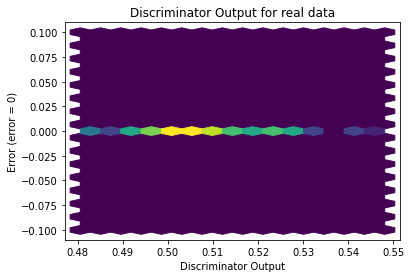

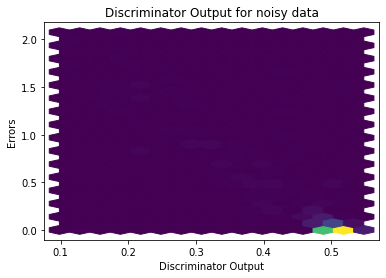

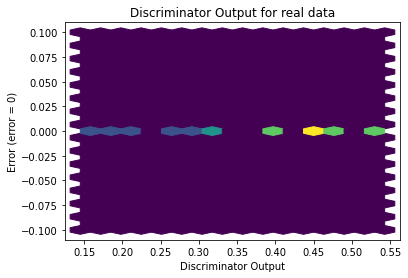

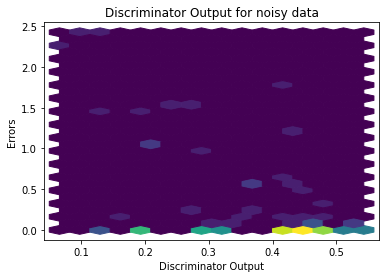

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1900]], requires_grad=True)
